# Amazon Reviews Analysis
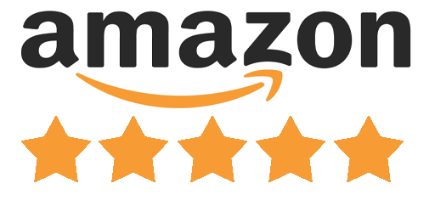

**By:** Pavitra Aritas Raghunath Sharma,  Laura Truong,  Ziqian Zhao

University of Massachusetts  Boston Spring 2025

MSIS 680: Group Project


Source: https://www.kaggle.com/datasets/tarkkaanko/amazon/data



# Introduction











Customer reviews are crucial in making purchasing decisions.
This research analyzes Amazon customer sentiment over time to uncover evolving patterns. This research focuses on understanding the patterns in Amazon customer sentiment over time, aiming to uncover what factors like product categories, seasons, or events, affect these shifts. By doing so, businesses can better align their strategies with customer needs and improve satisfaction




**Research Questions:**

**1. What are the evolving themes in customer complaints and praises over time?**

**Why it's valuable:**
This tells businesses what exactly customers care about delivery, quality, packaging, support, etc., and how priorities change.

**What this involves:**
Use NLP techniques to clean and vectorize reviews
Apply BERTopic to extract topics
Track topics over time and across the category
Visualize using topic trend lines and word clouds
Associate topics with sentiment (e.g., complaints vs praise)


**2. Do certain times of the year show spikes in positive or negative reviews?**

**Why it's valuable:**
Understanding sentiment spikes during key times (Holidays) helps businesses adapt strategies for customer support, marketing, and product development.

**What this involves:**
Identifying key sales periods
Sentiment Analysis
Time Series Analysis
Visualize time series plots and bar charts showing sentiment trends
Visualize spikes in sentiment around key dates.


**3. Can a lightweight TF‑IDF + Logistic Regression pipeline reliably predict review sentiment (positive vs. negative) using only pre‑cleaned text?**

**Why it's valuable:**
Using TF-IDF and Logistic Regression to automate sentiment analysis lets businesses quickly understand customer feedback, spot issues, and adjust their strategies for marketing, customer service, and product development.

**What this involves:**
Feature Engineering: Use TF-IDF to turn text into numerical values.
Modeling: Train a Logistic Regression model to classify sentiment (positive or negative).
Evaluation: Measure the model's performance with metrics like Macro-F1 score.

**4. How can we forecast customer sentiment trends over time using time series models?**

**Why it's valuable:**
Forecasting sentiment helps businesses anticipate changes in customer opinion, enabling proactive adjustments in marketing, customer service, and product development

**What this involves:**
Data Preparation: Convert sentiment to numeric values and set dates for time series analysis.
Modeling: Fit ARIMA and SARIMA models to capture trends and seasonality.
Forecasting: Predict future sentiment trends based on historical data.
Evaluation: Use MAE and RMSE to assess forecast accuracy.


We will use the following techniques to answer the research questions:

Topic Modeling with BERTopic: This tool will help us extract key themes from the reviews. It will let us track how customer concerns or praises change over time, such as delivery issues, product quality, or customer support.

Time Series Analysis: We will analyze sentiment trends over time to look for patterns tied to specific events (like Black Friday, Christmas, etc.), helping businesses understand when spikes in sentiment happen.

Sentiment Prediction (TF-IDF + Logistic Regression): Using the TF-IDF technique, we’ll convert the reviews into numbers and then apply Logistic Regression to predict sentiment, so businesses can automate sentiment analysis and respond quickly.

Forecasting with ARIMA/SARIMA: Building on the sentiment trends observed, ARIMA and SARIMA models will be employed to predict future sentiment patterns, assisting businesses in anticipating shifts in customer opinion and preparing strategies accordingly.


By analyzing these patterns, businesses can not only improve their products and services, but also connect with their customers. They can adjust strategies based on evolving feedback. Diving into customer sentiment can help companies provide better insights that make a difference in how they interact with their customers.

From an industry perspective, being able to extract insights from sentiment data can influence market strategies, product improvements, and customer service tactics. This can improve customer satisfaction and loyalty.

From an academia perspective, understanding sentiment analysis can help individuals learn to apply advanced data mining techniques to new problems. The knowledge gained from this study can not only help them better make purchase decisions, it will help them take the foundational knowledge from this project to tackle research questions in similar fields.

# Data Preparation


The dataset is sourced from Kaggle's Amazon Reviews Dataset, which contains Amazon product reviews and ratings. https://www.kaggle.com/datasets/tarkkaanko/amazon/data


This dataset addresses two main e-commerce challenges:

**Customer Satisfaction:** Analyzing reviews to gauge product performance.

**Review Ranking:** Ensuring accurate review sorting to prevent misleading feedback.

The dataset includes product reviews, ratings, and user feedback, making it valuable for analyzing customer sentiments, tracking product trends, and making data-driven business decisions.


**Variables:**
reviewerName: Name of the reviewer.

overall: Product rating (1–5 stars).

reviewText: The review content.

reviewTime: The timestamp when the review was posted.

day_diff: Days since the review.

helpful_yes/no: Number of users who found the review helpful/unhelpful.

total_vote: Total votes the review received.

score_pos_neg_diff: Difference between positive and negative votes.

score_average_rating: Adjusted rating.

wilson_lower_bound: Confidence interval for the rating.


**Usability:**
Ideal for sentiment analysis, customer satisfaction analysis, and tracking product performance. It allows businesses to improve products, spot issues, and engage with customers based on insights.

**Goal:** prepare Amazon reviews for NLP embedding & clustering by executing a rigorous, multi‑stage text‑cleaning
 pipeline.
Focus: illustrate every transformation on one concrete review, so changes are transparent.
Outcome: a high‑signal, low‑noise “clean _review” field ready for vectorisation.


In [ ]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tarkkaanko/amazon")

print("Path to dataset files:", path)

data = pd.read_csv("/kaggle/input/amazon/amazon_reviews.csv")
data.head()
#This code snippet reads the csv file and previews the first 5 rows of the data to give us an idea of what is in the dataset.

Path to dataset files: /kaggle/input/amazon


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
# =========================================================
# 0) INSTALL & IMPORT LIBRARIES
#    ------------------------------------------------------
#    - spacy        : tokenisation + POS + lemmatisation
#    - contractions : expand don't -> do not, etc.
#    - nltk         : English stop-word list
#    - tqdm         : progress bar for .apply()
# =========================================================
!pip install -q spacy contractions nltk tqdm
!python -m spacy download -q en_core_web_sm

import pandas as pd
import re, string, warnings
import contractions
import spacy
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

tqdm.pandas()                       # enable progress_apply()
warnings.filterwarnings("ignore")   # silence spaCy warnings

# =========================================================
# 1) ONE-TIME NLTK RESOURCE DOWNLOAD
# =========================================================
nltk.download('stopwords')

# =========================================================
# 2) BUILD STOP-WORD SET  (generic + domain specific)
#    ------------------------------------------------------
#    • Remove high-frequency, low-information tokens
#    • Keep negations because they flip sentiment
# =========================================================
domain_stop = {
    'amazon','product','item','buy','bought','purchase','purchased',
    'shipping','delivery','packaging','package','seller',
    'device','order','ordered','review','reviews','works','using','use'
}

stop_words = set(stopwords.words('english')).union(domain_stop)
stop_words.difference_update({'no', 'not', 'never'})  # ⇠ keep negations

# =========================================================
# 3) LOAD spaCy (disable pipes we do not need → speed-up)
# =========================================================
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser', 'textcat'])

# =========================================================
# 4) OPTIONAL — DROP **EXACT** DUPLICATE REVIEWS
#    ------------------------------------------------------
#    • Prevent repeated texts from biasing cluster sizes
# =========================================================
data = data.drop_duplicates(subset='reviewText').reset_index(drop=True)

# =========================================================
# 5) HELPER ─ REMOVE CONSECUTIVE TOKEN DUPLICATES
#    (e.g., "great great great" -> "great")
# =========================================================
def dedup_consecutive(tokens):
    return [tok for i, tok in enumerate(tokens) if i == 0 or tok != tokens[i-1]]

# =========================================================
# 6) MASTER CLEANING FUNCTION
#    ------------------------------------------------------
#    Steps:
#      1. Expand contractions
#      2. Lower-case & strip HTML / URLs
#      3. Remove punctuation & digits
#      4. spaCy → tokenize + POS + lemma
#      5. Filter:
#           • alphabetic
#           • POS in {NOUN, ADJ, VERB}
#           • not in stop-word list
#      6. Remove consecutive duplicates (optional)
#      7. Return single space-joined string
# =========================================================
def clean_review(text: str) -> str:
    if pd.isna(text):                       # safeguard for NaNs
        return ""

    # 1) Expand contractions  (didn't ➜ did not)
    text = contractions.fix(text)

    # 2) Lower-case & remove HTML/URLs
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)   # URLs
    text = re.sub(r'<.*?>', ' ', text)                   # HTML tags

    # 3) Remove punctuation & digits  (keep %/$ if desired)
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # 4) Tokenise & Lemmatise with spaCy
    doc = nlp(text)

    # 5) Keep informative tokens only
    tokens = [
        tok.lemma_ for tok in doc
        if tok.lemma_.isalpha()                   # alphabetic only
        and tok.lemma_ not in stop_words          # drop stop-words
        and tok.pos_ in {'NOUN', 'ADJ', 'VERB'}   # content POS
    ]

    # 6) Remove consecutive duplicates (optional but cheap)
    tokens = dedup_consecutive(tokens)

    # 7) Return cleaned review
    return " ".join(tokens)

# =========================================================
# 7) APPLY CLEANING (with progress bar)
# =========================================================
data['clean_review'] = data['reviewText'].astype(str).progress_apply(clean_review)

# =========================================================
# 8) QUICK PREVIEW  – OR COMMENT OUT IN PRODUCTION
# =========================================================
data[['reviewText', 'clean_review']].head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 2.1 MB/s eta 0:00:00

✘ No compatible package found for '-q' (spaCy v3.8.5)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
100%|██████████| 4913/4913 [00:39<00:00, 122.85it/s]


,reviewText,clean_review
0,No issues.,issue
1,"Purchased this for my device, it worked as adv...",work advertise much phone memory download lot ...
2,it works as expected. I should have sprung for...,work expect spring high capacity think make bi...
3,This think has worked out great.Had a diff. br...,think work greathad different bran gb card go ...
4,"Bought it with Retail Packaging, arrived legit...",retail arrive legit envelope version asian pic...


In [ ]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,clean_review
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,issue
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,work advertise much phone memory download lot ...
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,work expect spring high capacity think make bi...
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,think work greathad different bran gb card go ...
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,retail arrive legit envelope version asian pic...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Classify Reviews as Positive or Negative

In [ ]:
data['review_sentiment'] = data['overall'].apply(lambda x: 'positive' if x >= 4 else 'negative')


Extract Time Features of Month, Year, Week, Day of Week

In [ ]:
# Convert 'reviewTime' to datetime format and store it in a new 'Date' column
data['Date'] = pd.to_datetime(data['reviewTime'], errors='coerce')

# Extract time-based features using the new 'Date' column
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['week'] = data['Date'].dt.isocalendar().week
data['day_of_week'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

In [ ]:
data.to_csv("/content/drive/My Drive/cleaned_amazon_reviews.csv", index=False)


# Exploratory Data Analysis


# **Research Question 1:** What are the evolving themes in customer complaints and praises over time?

Customer reviews play a vital role in shaping purchasing decisions, yet understanding their evolving sentiments over time remains a challenge for businesses aiming to improve products and services. With this research question we are trying to address the problem of identifying shifting themes in customer feedback by analyzing Amazon reviews from 2012 to 2014, focusing on the question: What are the evolving themes in customer complaints and praises over time? Using the Amazon reviews dataset, I employed BERTopic, a topic modeling technique, to extract themes from review texts, grouping them by year and sentiment (complaints: ratings ≤ 3; praises: ratings ≥ 4), and visualized trends through line plots and word clouds. This analysis will help consumers and businesses by uncovering key pain points, such as persistent memory card compatibility issues, and strengths, like fast delivery, enabling better decision-making and targeted improvements.

* Problem Statement: Highlighted the challenge of understanding evolving
customer sentiments and its importance for purchasing decisions.
* Why It’s Interesting: Emphasized the value for businesses looking to enhance products/services based on customer feedback.
*  Data and Methodology: Specified the Amazon reviews dataset (2012–2014) and the use of BERTopic for topic modeling, with sentiment classification and visualization.
* How It Helps: Noted that the analysis reveals key issues (e.g., compatibility) and strengths (e.g., delivery), aiding consumers and businesses in decision-making.

In [ ]:

data['review_sentiment'] = data['overall'].apply(lambda x: 'complaint' if x <= 3 else 'praise')
# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

import pandas as pd
import re, string, warnings
import contractions
import spacy
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer
from collections import defaultdict
!pip install bertopic
from bertopic import BERTopic


tqdm.pandas()
warnings.filterwarnings("ignore")

# =========================================================
# 1) ONE-TIME NLTK RESOURCE DOWNLOAD
# =========================================================
nltk.download('stopwords')
# Step 2: Preprocess review text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 3.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#BERTopic for topic modeling
# Initialize SentenceTransformer for embeddings
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to perform BERTopic modeling for a subset of data
def apply_bertopic(sub_data, min_topic_size=10):
    if len(sub_data) < min_topic_size:
        return None, None
    docs = sub_data['clean_review'].tolist()
    embeddings = embedding_model.encode(docs, show_progress_bar=True)
    topic_model = BERTopic(embedding_model=embedding_model, min_topic_size=min_topic_size, verbose=True)
    topics, probs = topic_model.fit_transform(docs, embeddings)
    return topic_model, topics


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Analyze topics for complaints and praises separately over time
def analyze_topics_over_time(sub_data, sentiment):
    topics_over_time = defaultdict(list)
    topic_info = {}
    for year, group in sub_data.groupby('year'):
        print(f"Processing {sentiment} for {year}...")
        topic_model, topics = apply_bertopic(group)
        if topic_model is None:
            continue
        topics_over_time[year] = topic_model.get_topic_info()
        topic_info[year] = topic_model
        print(f"\n{sentiment} Topics for {year}:")
        print(topics_over_time[year][['Topic', 'Count', 'Name']])
    return topics_over_time, topic_info

In [ ]:
# Split data by sentiment
complaints = data[data['review_sentiment'] == 'complaint']
praises = data[data['review_sentiment'] == 'praise']
print("\nCheckpoint 15: Split data by sentiment")
print("Number of complaints:", len(complaints))
print("Number of praises:", len(praises))


Checkpoint 15: Split data by sentiment
Number of complaints: 466
Number of praises: 4447


In [ ]:
# Run topic modeling
complaint_topics, complaint_models = analyze_topics_over_time(complaints, "Complaint")
praise_topics, praise_models = analyze_topics_over_time(praises, "Praise")

Processing Complaint for 2012...


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-05-16 23:32:28,481 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-16 23:32:56,489 - BERTopic - Dimensionality - Completed ✓
2025-05-16 23:32:56,490 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-16 23:32:56,521 - BERTopic - Cluster - Completed ✓
2025-05-16 23:32:56,537 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-16 23:32:56,612 - BERTopic - Representation - Completed ✓



Complaint Topics for 2012:
   Topic  Count                       Name
0     -1     36     -1_card_phone_work_get
1      0     29  0_card_class_speed_format
2      1     12     1_card_start_get_think
Processing Complaint for 2013...


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

2025-05-16 23:33:12,576 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-16 23:33:13,128 - BERTopic - Dimensionality - Completed ✓
2025-05-16 23:33:13,130 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-16 23:33:13,146 - BERTopic - Cluster - Completed ✓
2025-05-16 23:33:13,152 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-16 23:33:13,183 - BERTopic - Representation - Completed ✓



Complaint Topics for 2013:
   Topic  Count                        Name
0     -1    117    -1_card_get_sandisk_work
1      0     69   0_card_phone_galaxy_month
2      1     25    1_gopro_card_camera_hero
3      2     18   2_card_memory_say_sandisk
4      3     17    3_speed_write_read_class
5      4     17     4_phone_android_gb_card
6      5     14  5_phone_datum_format_error
Processing Complaint for 2014...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2025-05-16 23:33:17,341 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-16 23:33:17,647 - BERTopic - Dimensionality - Completed ✓
2025-05-16 23:33:17,649 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-16 23:33:17,657 - BERTopic - Cluster - Completed ✓
2025-05-16 23:33:17,662 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-16 23:33:17,681 - BERTopic - Representation - Completed ✓



Complaint Topics for 2014:
   Topic  Count                        Name
0     -1    112  -1_card_work_sandisk_phone
Processing Praise for 2012...


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

2025-05-16 23:33:40,535 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-16 23:33:41,901 - BERTopic - Dimensionality - Completed ✓
2025-05-16 23:33:41,902 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-16 23:33:41,928 - BERTopic - Cluster - Completed ✓
2025-05-16 23:33:41,933 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-16 23:33:41,964 - BERTopic - Representation - Completed ✓



Praise Topics for 2012:
   Topic  Count                               Name
0     -1    201          -1_card_phone_work_galaxy
1      0     56           0_card_write_class_speed
2      1     50           1_camera_video_work_card
3      2     37            2_good_price_great_card
4      3     36         3_format_work_phone_galaxy
5      4     34            4_tablet_gb_music_space
6      5     10  5_transfer_music_speed_difference
Processing Praise for 2013...


Batches:   0%|          | 0/75 [00:00<?, ?it/s]

2025-05-16 23:34:21,383 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-16 23:34:33,795 - BERTopic - Dimensionality - Completed ✓
2025-05-16 23:34:33,798 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-16 23:34:34,033 - BERTopic - Cluster - Completed ✓
2025-05-16 23:34:34,042 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-16 23:34:34,135 - BERTopic - Representation - Completed ✓



Praise Topics for 2013:
   Topic  Count                     Name
0     -1     43  -1_roku_great_work_asus
1      0   2344  0_card_work_phone_great
2      1     13  1_gps_map_garmin_update
Processing Praise for 2014...


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2025-05-16 23:34:58,574 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-16 23:35:04,919 - BERTopic - Dimensionality - Completed ✓
2025-05-16 23:35:04,920 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-16 23:35:05,049 - BERTopic - Cluster - Completed ✓
2025-05-16 23:35:05,056 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-16 23:35:05,111 - BERTopic - Representation - Completed ✓



Praise Topics for 2014:
   Topic  Count                       Name
0     -1     71  -1_work_great_nook_instal
1      0   1463   0_card_work_phone_memory
2      1     45    1_price_great_work_good
3      2     44      2_work_great_say_good


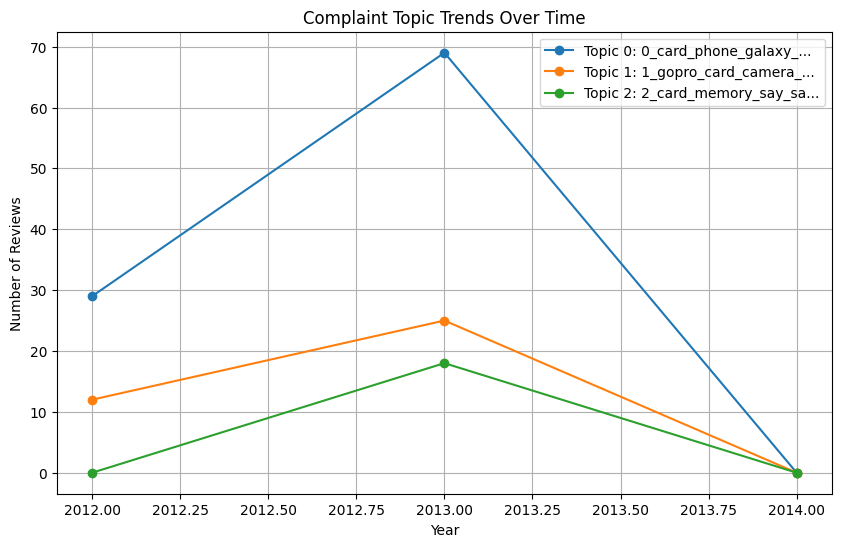

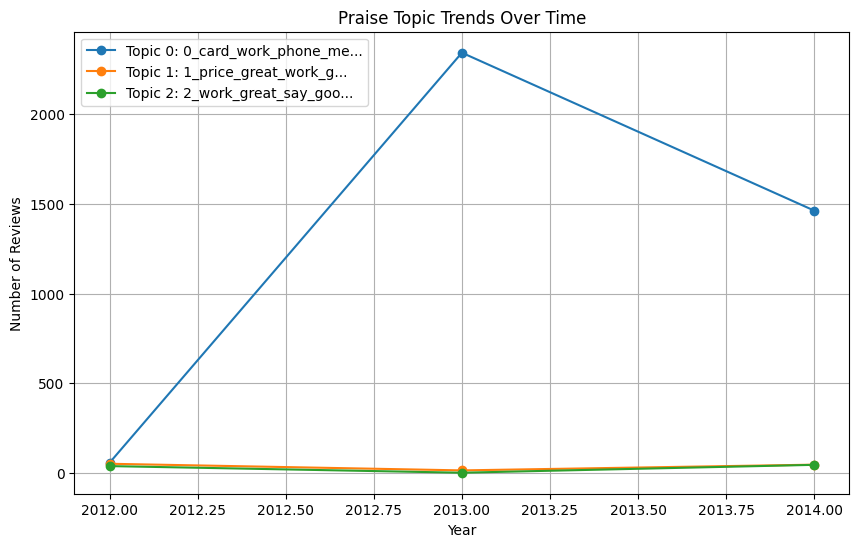

In [ ]:
# Visualize topic trends and plot trends for top 3 topics
import matplotlib.pyplot as plt
def plot_topic_trends(topics_dict, sentiment, top_n=3):
    plt.figure(figsize=(10, 6))
    for topic_id in range(top_n):
        years = sorted(topics_dict.keys())
        counts = []
        topic_name = ""
        for year in years:
            topic_info = topics_dict[year]
            topic_row = topic_info[topic_info['Topic'] == topic_id]
            if not topic_row.empty:
                counts.append(topic_row['Count'].iloc[0])
                topic_name = topic_row['Name'].iloc[0]
            else:
                counts.append(0)
        plt.plot(years, counts, marker='o', label=f'Topic {topic_id}: {topic_name[:20]}...')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.title(f'{sentiment} Topic Trends Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


if complaint_topics:
    plot_topic_trends(complaint_topics, "Complaint")
if praise_topics:
    plot_topic_trends(praise_topics, "Praise")

As we’ve seen, customer sentiments on Amazon from both complaints and praises evolve in intriguing ways over time. But are these trends random, or do they reveal consistent themes that matter to businesses and consumers alike?

To find out, I grouped reviews by year and sentiment: complaints (ratings ≤ 3) and praises (ratings ≥ 4). Then, using BERTopic, I extracted dominant themes from each category. This helped surface what people were actually talking about not just whether they were happy or frustrated, but why. Rather than treating the review text as static, I uncovered new variables like the top topic for each year and sentiment, how frequently each topic was mentioned, and the key words associated with those topics.

For instance, one line plot reveals that complaints about memory card compatibility remained a recurring issue across all three years. This wasn't immediately obvious from the ratings alone, but topic modeling exposed this as a persistent frustration. Meanwhile, praises consistently featured themes like fast delivery, a clear strength Amazon maintained over time. These plots are not just showing data; they’re showing stories about recurring pain points and enduring value.

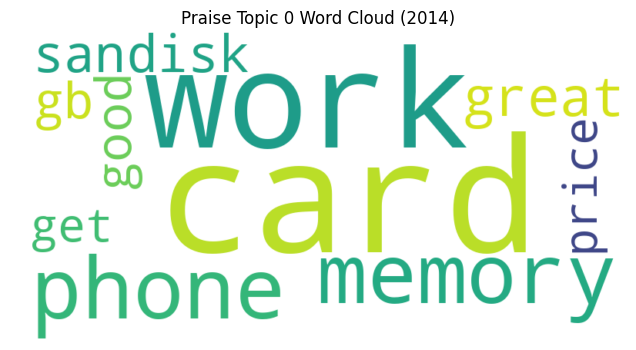

In [ ]:
# Generate word clouds for top topics
from wordcloud import WordCloud
def generate_word_cloud(topic_model, topic_id, sentiment, year):
    if topic_model is None or topic_id not in topic_model.get_topic_info()['Topic'].values:
        return
    topic_words = topic_model.get_topic(topic_id)
    word_dict = {word: weight for word, weight in topic_words}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} Topic {topic_id} Word Cloud ({year})')
    plt.show()

latest_year = max(complaint_topics.keys(), default=None)
if latest_year and complaint_models[latest_year]:
    generate_word_cloud(complaint_models[latest_year], 0, "Complaint", latest_year)
latest_year = max(praise_topics.keys(), default=None)
if latest_year and praise_models[latest_year]:
    generate_word_cloud(praise_models[latest_year], 0, "Praise", latest_year)

Word clouds help visualize the dominant terms in each topic group. For example, in complaint-based topics, large keywords like “card,” “work,” and “return” jump out suggesting ongoing product reliability concerns. In contrast, praise-based word clouds feature terms like “great,” “fast,” and “love,” emphasizing customer satisfaction, especially around service and delivery.

In [ ]:
# Summarize findings
def summarize_topics(topics_dict, sentiment):
    print(f"\nSummary of {sentiment} Topics:")
    for year in sorted(topics_dict.keys()):
        print(f"\n{year}:")
        top_topics = topics_dict[year].head(3)[['Name', 'Count']]
        for _, row in top_topics.iterrows():
            print(f"Topic: {row['Name']}, Reviews: {row['Count']}")

summarize_topics(complaint_topics, "Complaint")
summarize_topics(praise_topics, "Praise")


Summary of Complaint Topics:

2012:
Topic: -1_card_phone_work_get, Reviews: 36
Topic: 0_card_class_speed_format, Reviews: 29
Topic: 1_card_start_get_think, Reviews: 12

2013:
Topic: -1_card_get_sandisk_work, Reviews: 117
Topic: 0_card_phone_galaxy_month, Reviews: 69
Topic: 1_gopro_card_camera_hero, Reviews: 25

2014:
Topic: -1_card_work_sandisk_phone, Reviews: 112

Summary of Praise Topics:

2012:
Topic: -1_card_phone_work_galaxy, Reviews: 201
Topic: 0_card_write_class_speed, Reviews: 56
Topic: 1_camera_video_work_card, Reviews: 50

2013:
Topic: -1_roku_great_work_asus, Reviews: 43
Topic: 0_card_work_phone_great, Reviews: 2344
Topic: 1_gps_map_garmin_update, Reviews: 13

2014:
Topic: -1_work_great_nook_instal, Reviews: 71
Topic: 0_card_work_phone_memory, Reviews: 1463
Topic: 1_price_great_work_good, Reviews: 45


# **Research Question 2:** Do certain times of the year (such as holidays or special events) show spikes in positive or negative reviews?

Customer reviews reflect seasonal trends, especially during key events like Black Friday, Cyber Monday, and Christmas. This research addresses whether there are noticeable spikes in positive or negative sentiment during these periods. By analyzing Amazon reviews from 2012 to 2014, I used time series analysis to track sentiment changes month by month. The findings, visualized through bar charts and line graphs, will help businesses understand when customer satisfaction peaks and dips, allowing for better-targeted strategies during high-traffic shopping times.


*   Problem Statement: Identifying seasonal sentiment fluctuations to help businesses optimize their operations during key events.
*   Why It’s Interesting: Helps businesses adjust marketing and customer service strategies based on sentiment trends during major shopping periods.
*   Data and Methodology: Analyzed Amazon reviews from 2012–2014, using time series analysis to visualize sentiment trends.
*   How It Helps: Provides insights into customer behavior, helping businesses improve satisfaction and optimize operations during high-demand periods.








### 1. Do certain times of the year show spikes in positive or negative reviews?

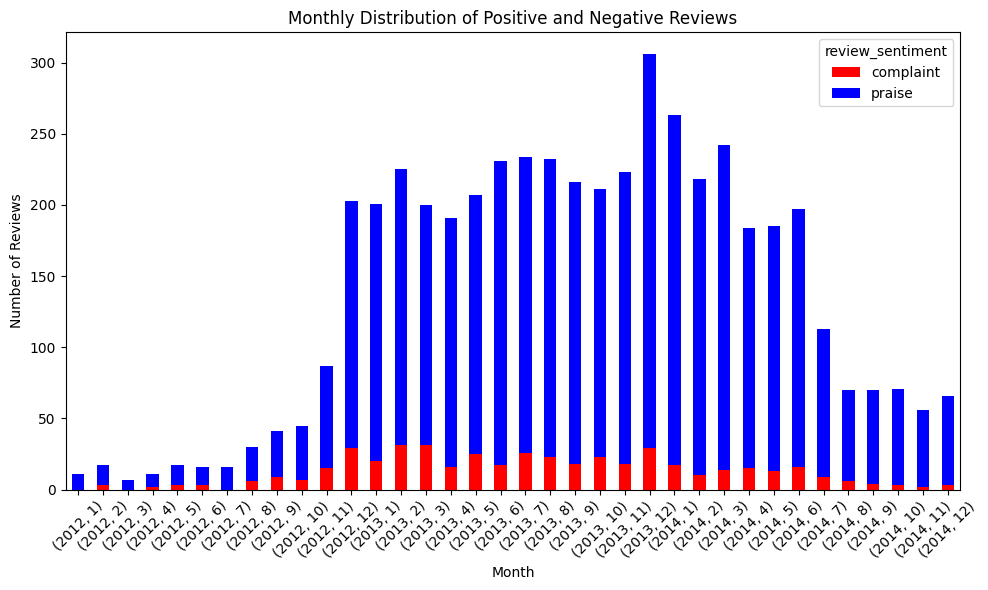

In [ ]:
#Monthly Distribution of Positive and Negative Reviews
import matplotlib.pyplot as plt
import seaborn as sns
# Group by month and year. Count positive and negative reviews
monthly_sentiment = data.groupby(['year', 'month', 'review_sentiment']).size().unstack(fill_value=0)
# Select 'complaint' and 'praise' columns instead of 'negative' and 'positive'
monthly_sentiment = monthly_sentiment[['complaint', 'praise']]  # Changed line
colors = {
    'complaint': 'red',  # Updated color mapping
    'praise': 'blue'     # Updated color mapping
}
# Plot distribution of positive and negative reviews by month
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6),
                       color=[colors[col] for col in monthly_sentiment.columns])
plt.title("Monthly Distribution of Positive and Negative Reviews")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see that the positive reviews (blue) are higher across all months, with some peaks in November and December 2013. This tells us that there were more positive sentiment than negative ones.

The plot shows some seasonal patterns, with noticable spikes around the holiday time of Thanksgiving/Christmas.

Negative reviews are much fewer and there are less negative reviews particularly in the Spring/Summer. This may be because people are out on vacation during spring/summer breaks.

Now, lets dive deeper and Review Sentiment Distribution by Holidays or Special Events.

Black Friday is known for massive sales and discounts at the malls. Cyber Monday happens the following Monday and includes online sales.

Christmas is another holiday that is associated with gift-giving and increased shopping. Similar to Black Friday, we expect a large number of positive reviews but also some negative sentiment that is related to shipping delays or product issues during this high sales period.

### 2. How does review sentiment change around major holidays such as Black Friday or Christmas?

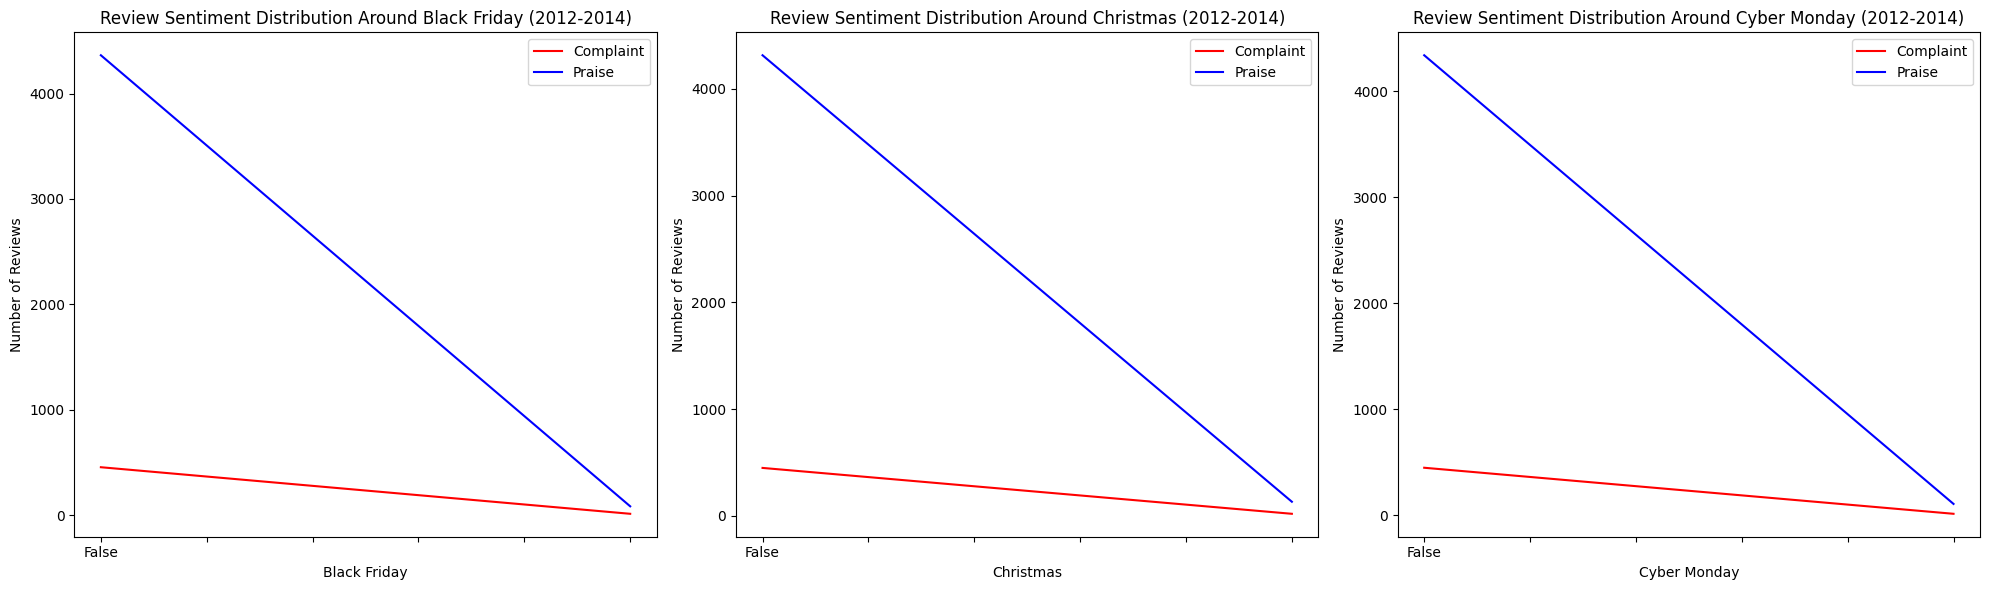

In [ ]:
# Define the holiday periods for Black Friday, Christmas, and Cyber Monday (2012-2014)
holidays = {
    "Black Friday": ['2012-11-23', '2013-11-29', '2014-11-28'],  # Black Friday for 2012, 2013, 2014
    "Christmas": ['2012-12-25', '2013-12-25', '2014-12-25'],     # Christmas for 2012, 2013, 2014
    "Cyber Monday": ['2012-11-26', '2013-12-02', '2014-12-01'],   # Cyber Monday for 2012, 2013, 2014
}

# Map 'praise' to positive sentiment (1) and 'complaint' to negative sentiment (-1)
sentiment_mapping = {'praise': 1, 'complaint': -1}
data['sentiment_numeric'] = data['review_sentiment'].map(sentiment_mapping)

# Create a column for each holiday, checking if the review's date is within 3 days before or after the holiday
for holiday, dates in holidays.items():
    data[holiday] = data['Date'].apply(lambda x: any(
        (pd.to_datetime(x) >= pd.to_datetime(date) - pd.Timedelta(days=3)) and
        (pd.to_datetime(x) <= pd.to_datetime(date) + pd.Timedelta(days=3))
        for date in dates))

# Sentiment distribution around Black Friday, Christmas, and Cyber Monday
color_mapping = {
    'complaint': 'red',    # Red for complaint sentiment
    'praise': 'blue'    # Blue for praise sentiment
}

# Group sentiment distribution by holiday and sentiment type (complaint or praise)
holiday_sentiment_black_friday = data.groupby(['Black Friday', 'review_sentiment']).size().unstack(fill_value=0)
holiday_sentiment_christmas = data.groupby(['Christmas', 'review_sentiment']).size().unstack(fill_value=0)
holiday_sentiment_cyber_monday = data.groupby(['Cyber Monday', 'review_sentiment']).size().unstack(fill_value=0)

# Create side-by-side subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot Black Friday on the first subplot, manually assigning colors
holiday_sentiment_black_friday.loc[:, 'complaint'].plot(kind='line', ax=ax[0], color=color_mapping['complaint'], label='Complaint') # Changed to 'complaint'
holiday_sentiment_black_friday.loc[:, 'praise'].plot(kind='line', ax=ax[0], color=color_mapping['praise'], label='Praise') # Changed to 'praise'

ax[0].set_title("Review Sentiment Distribution Around Black Friday (2012-2014)")
ax[0].set_xlabel("Black Friday")
ax[0].set_ylabel("Number of Reviews")
ax[0].legend()

# Plot Christmas on the second subplot, manually assigning colors
holiday_sentiment_christmas.loc[:, 'complaint'].plot(kind='line', ax=ax[1], color=color_mapping['complaint'], label='Complaint') # Changed to 'complaint'
holiday_sentiment_christmas.loc[:, 'praise'].plot(kind='line', ax=ax[1], color=color_mapping['praise'], label='Praise') # Changed to 'praise'

ax[1].set_title("Review Sentiment Distribution Around Christmas (2012-2014)")
ax[1].set_xlabel("Christmas")
ax[1].set_ylabel("Number of Reviews")
ax[1].legend()

# Plot Cyber Monday on the third subplot, manually assigning colors
holiday_sentiment_cyber_monday.loc[:, 'complaint'].plot(kind='line', ax=ax[2], color=color_mapping['complaint'], label='Complaint') # Changed to 'complaint'
holiday_sentiment_cyber_monday.loc[:, 'praise'].plot(kind='line', ax=ax[2], color=color_mapping['praise'], label='Praise') # Changed to 'praise'

ax[2].set_title("Review Sentiment Distribution Around Cyber Monday (2012-2014)")
ax[2].set_xlabel("Cyber Monday")
ax[2].set_ylabel("Number of Reviews")
ax[2].legend()

# Display
plt.tight_layout()
plt.show()


In [ ]:
# Filter complaints and praises after cleaning
complaints = data[data['review_sentiment'] == 'complaint']
praises = data[data['review_sentiment'] == 'praise']


These look identical. Lets take a look at the numbers and see why the graphs look the same.

In [ ]:
# Check the distribution of review sentiments
print(data['review_sentiment'].value_counts())

#There are 4447 positive reviews and 466 negative reviews.

review_sentiment
praise       4447
complaint     466
Name: count, dtype: int64


In [ ]:
# Check if reviews are present for the holiday ranges (±3 days)
for holiday in holidays:
    print(f"Checking reviews for {holiday}:")
    for date in holidays[holiday]:
        date_range = pd.to_datetime(date) + pd.Timedelta(days=3)
        print(f"Reviews around {date} (+/-3 days):")
        holiday_reviews = data[(data['Date'] >= pd.to_datetime(date) - pd.Timedelta(days=3)) &
                               (data['Date'] <= date_range)]
        print(f"Number of reviews around {date}: {holiday_reviews.shape[0]}")
        print(holiday_reviews[['Date', 'review_sentiment']].head())

#Overall Positive Sentiment for all holidays (Black Friday, Christmas, and Cyber Monday), the sentiment is largely positive. Negative reviews are fewer.

#For Christmas 2014, there are no reviews in the ±3 day range. This may be due to missing data, fewer reviews being submitted, or an issue in the dataset.

#Trends:
#Black Friday: Reviews were higher in 2013 (59 reviews) all positive compared to 2012 (26 reviews) all positive, but 2014 showed a drop (only 10 reviews) all positive.

#Christmas: Reviews remain relatively consistent over the years, 2012 (80) mostly positive, 2013 (69) with a few negative reviews interspersed. 2014 showed no reviews during Christmas

#Cyber Monday: Review counts are somewhat consistent, with 2012 (37) all positive, 2013 being the peak year in terms of review counts (53 reviews) mostly positive, and 2014 (35) all positive


Checking reviews for Black Friday:
Reviews around 2012-11-23 (+/-3 days):
Number of reviews around 2012-11-23: 26
          Date review_sentiment
27  2012-11-21           praise
69  2012-11-26           praise
96  2012-11-26           praise
260 2012-11-26           praise
746 2012-11-22           praise
Reviews around 2013-11-29 (+/-3 days):
Number of reviews around 2013-11-29: 59
          Date review_sentiment
62  2013-11-26           praise
215 2013-11-27           praise
350 2013-11-28           praise
361 2013-11-26           praise
476 2013-11-26           praise
Reviews around 2014-11-28 (+/-3 days):
Number of reviews around 2014-11-28: 10
           Date review_sentiment
598  2014-12-01           praise
833  2014-12-01           praise
1044 2014-12-01           praise
2350 2014-12-01           praise
2914 2014-12-01           praise
Checking reviews for Christmas:
Reviews around 2012-12-25 (+/-3 days):
Number of reviews around 2012-12-25: 80
          Date review_sentiment
2  

In [ ]:
# Check sentiment data for holidays
print("Black Friday Sentiment Distribution:")
print(data[data['Black Friday'] == True]['review_sentiment'].value_counts())

print("Christmas Sentiment Distribution:")
print(data[data['Christmas'] == True]['review_sentiment'].value_counts())

print("Cyber Monday Sentiment Distribution:")
print(data[data['Cyber Monday'] == True]['review_sentiment'].value_counts())

#The vast majority of of reviews for Black Friday positive. Consumers are mostly happy with their purchases during black friday. Christmas was also the same. There were 131 positive reviews and only 18 negative ones. Christmas
#shopping seemed to have led to mostly favorable sentiments, and cyber monday also had a strong positive sentiment with 109 positive reviews and 16 negative reviews.

#Black Friday has the lowest number of negative reviews (12), followed by Cyber Monday (16), and Christmas (18).

Black Friday Sentiment Distribution:
review_sentiment
praise       83
complaint    12
Name: count, dtype: int64
Christmas Sentiment Distribution:
review_sentiment
praise       131
complaint     18
Name: count, dtype: int64
Cyber Monday Sentiment Distribution:
review_sentiment
praise       109
complaint     16
Name: count, dtype: int64



As we've seen, major holidays like Black Friday, Christmas, and Cyber Monday trigger more positive reviews. But are these spikes limited to these events, or do broader seasonal patterns exist?

Let’s take a look at how sentiment changes depending on the day of the week. Are people more likely to leave positive reviews on weekends, or does it stay pretty consistent throughout the week? By analyzing sentiment day by day, we can see if there’s a pattern tied to when the reviews are written.

### 3. Does sentiment change based on the day of the week? For example, are there more positive reviews on weekends?

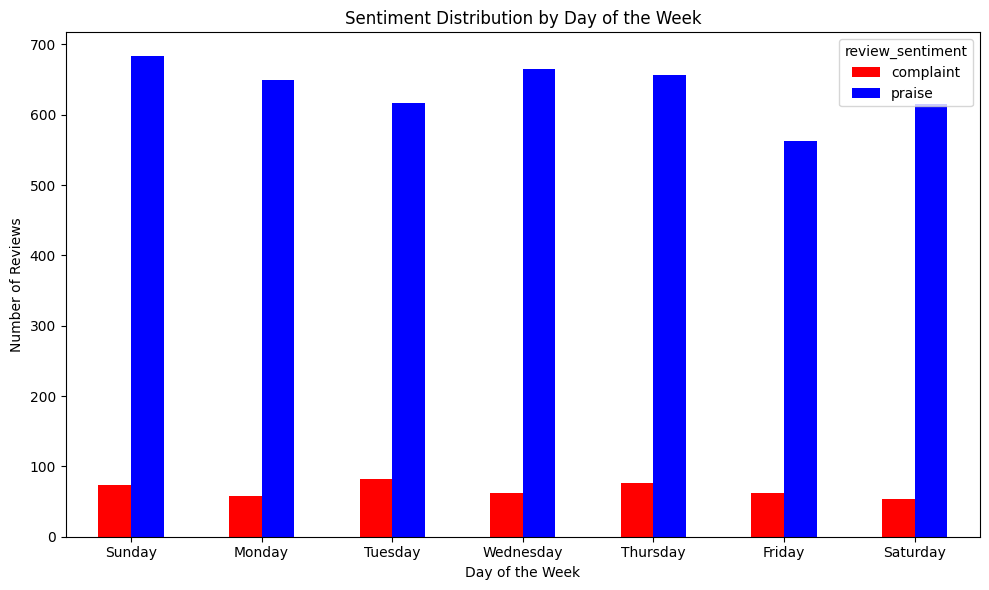

In [ ]:
# Group by day of the week and sentiment
day_sentiment = data.groupby(['day_of_week', 'review_sentiment']).size().unstack(fill_value=0)

# Define the day names
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


colors = {
    'complaint': 'red',  # Red for complaints
    'praise': 'blue'     # Blue for praise
}


day_sentiment = day_sentiment[['complaint', 'praise']]

# Plotting sentiment distribution by day of the week
day_sentiment.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in day_sentiment.columns])

# Customize the plot
plt.title("Sentiment Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.xticks(ticks=range(7), labels=day_names, rotation=0)  # Adding custom labels for days of the week
plt.tight_layout()
plt.show()

# Insights from the plot:
# The blue bars show that positive sentiment dominates across all days of the week.
# It appears that reviews are mostly positive, regardless of the day of the week.
# There is minimal negative (red)  in the reviews.
#Though they are very close, more praise is given on Sunday, Wednesday, and Thursday.


While we see some day-to-day patterns in sentiment, it’s also important to zoom out and look at longer-term trends. By analyzing sentiment over months or years, we can uncover larger shifts and see how external factors—like holidays or product launches—impact customer opinions over time.

### 4. How do customer sentiments evolve over extended periods, such as months or years and what long term trends can be identified from this data?

By examining sentiment trends over longer periods (months, years), you can uncover broader patterns and shifts in customer sentiment over time. This helps businesses understand how customer opinions may have changed due to external factors like product launches, company performance, or economic conditions.


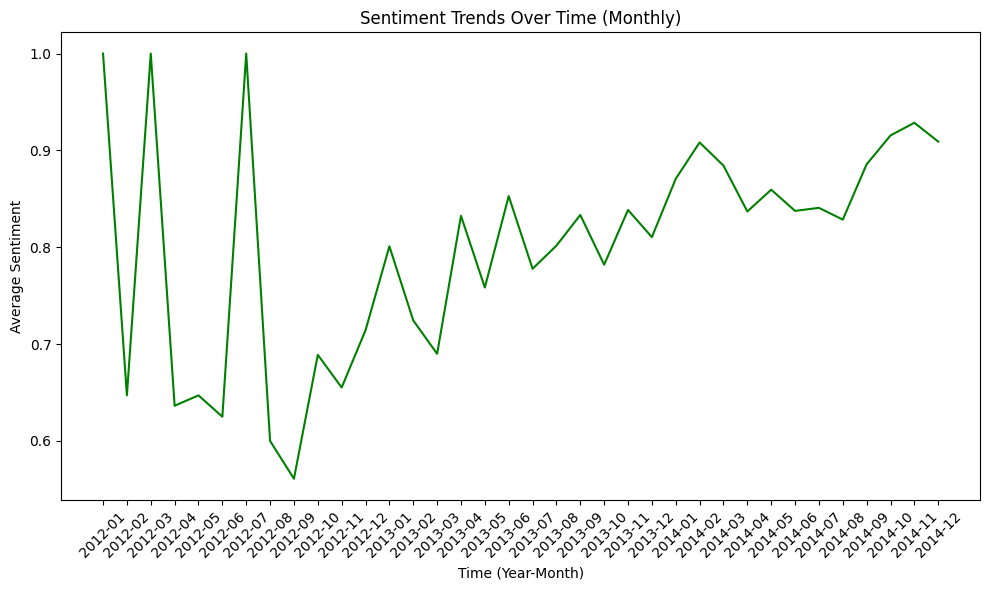

In [ ]:
# Group by year and month and calculate the average sentiment
monthly_sentiment = data.groupby(['year', 'month'])['sentiment_numeric'].mean()

# Convert the MultiIndex (year, month) to a string format 'YYYY-MM' for plotting
time_index_str = [f'{year}-{month:02d}' for year, month in monthly_sentiment.index]

# Plot sentiment trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use the created string index for the x-axis
plt.plot(time_index_str, monthly_sentiment.values, label='Monthly Sentiment Trend', color='green')
plt.title('Sentiment Trends Over Time (Monthly)')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Sentiment Scale:
#1.0	Very positive sentiment (glowing reviews)
#0.7–0.8	Generally positive (satisfied customers)
#0.6	Mixed/neutral (some dissatisfaction)
#< 0.6	Negative sentiment (unhappy customers)

There is initial volatility in 2012. We can see significant fluctuation in early 2012 with average sentiment spiking to 1 in some months and dropping to..55 in others. This could show inconsistent experiences, possibly tied to early stage product/service instability or data sparsity.

In 2013-2014 we see more stabilization. The sentiment looks stabilized in 2013, fluctuating less dramatically between .7 and .85.

In 2014, there is a more clear upward trend that reaches over .9 average sentiment in the last few months of the year. This may suggest that customer satisfaction steadily improved.

There is an overall positive upward trend in sentiment across the three year period. Amazon may have addressed earlier issues or improved customer experience significantly over time.


Early stage feedback is important. The volatile sentiment in 2012 may have provided Amazon valuable input that guided future improvements.

The rising and stable sentiment in 2013-2014 shows the growing customer trust and satisfaction with using Amazon. This could be influenced by factors like Amazon's improved third party seller vetting and the support processes that Amazon put in place to make returns more efficient and customer-service friendly.



# Predictive Data Analysis


# **Research Question 3:** Can a lightweight TF‑IDF + Logistic Regression pipeline reliably predict review sentiment (positive vs. negative) using only pre‑cleaned text?

Target (Y): The sentiment of reviews, classified as 1 for positive (overall rating ≥ 4) and 0 for negative (overall rating < 4).

Features (X): Pre-processed review text (clean_review) transformed using TF-IDF to capture relevant unigrams and bigrams.

We used Logistic Regression for binary sentiment classification, chosen for its simplicity, interpretability, and efficiency with sparse data, typical in text classification.



**Evaluation Metrics:**
Accuracy to assess correct predictions.
F1 Score (Macro) to balance performance across both positive and negative classes, addressing class imbalance.
Confusion Matrix to visualize model performance and error distribution.

**Pre-processing and Feature Engineering**
Cleaned text by removing punctuation, stopwords, and special characters. Applied TF-IDF vectorization to capture word importance, using both unigrams and bigrams.

**Fine-tuning**
Optimized hyperparameters like max_iter and used cross-validation (5-fold) to ensure generalization. Class balancing improved performance by adjusting for the higher number of positive reviews.

**Final Model and Accuracy**
Logistic Regression was selected for its performance.
Achieved an F1 macro score of 0.808, indicating solid model accuracy and generalization.



In [ ]:
# =========================================================
# =========================================================
!pip install -q scikit-learn spacy tqdm
!python -m spacy download -q en_core_web_sm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import spacy, re, string, tqdm

# =========================================================
# =========================================================
df = data[['overall', 'clean_review']].dropna()

# 2)
df['label'] = (df['overall'] >= 4).astype(int)

# =========================================================
# =========================================================
tfidf = TfidfVectorizer(max_features=20_000,
                        ngram_range=(1,2),
                        min_df=3,
                        sublinear_tf=True)

X = tfidf.fit_transform(df['clean_review'])
y = df['label'].values

# =========================================================
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

clf = LogisticRegression(max_iter=500, n_jobs=-1, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print(f"5‑fold macro‑F1: {scores.mean():.3f} ± {scores.std():.3f}")

# =========================================================
# =========================================================
feature_names = np.array(tfidf.get_feature_names_out())
coef = clf.coef_.ravel()
top_pos = feature_names[coef.argsort()[-20:]]
top_neg = feature_names[coef.argsort()[:20]]
print("Top‑positive words:\n", top_pos[::-1])
print("Top‑negative words:\n", top_neg)


✘ No compatible package found for '-q' (spaCy v3.8.5)

              precision    recall  f1-score   support

           0      0.590     0.742     0.657        93
           1      0.972     0.946     0.959       890

    accuracy                          0.927       983
   macro avg      0.781     0.844     0.808       983
weighted avg      0.936     0.927     0.930       983

5‑fold macro‑F1: 0.808 ± 0.019
Top‑positive words:
 ['great' 'work great' 'fast' 'tablet' 'space' 'good' 'price' 'memory'
 'easy' 'work' 'storage' 'love' 'video' 'nice' 'recommend' 'issue'
 'complaint' 'happy' 'like' 'plug']
Top‑negative words:
 ['return' 'month' 'try' 'lose' 'die' 'disappointed' 'card' 'fail' 'stop'
 'format' 'get' 'start' 'bad' 'replacement' 'stop work' 'slow' 'write'
 'common' 'remove' 'different']


After predicting sentiment using TF-IDF + Logistic Regression, the next step is to forecast sentiment over time. While predictive models focus on individual reviews, time series models like ARIMA and SARIMA help uncover broader sentiment trends. This analysis will allow businesses to anticipate future sentiment shifts and adjust strategies accordingly.

# **Research Question 4:** How can we forecast customer sentiment trends over time using time series models?

Target (Y): Sentiment (positive/negative) based on review ratings.
Features (X): Preprocessed review text and time-related data (e.g., dates, holiday periods).

ARIMA and SARIMA: SARIMA was chosen for its ability to capture seasonal trends, crucial for predicting sentiment around holidays and events.

**Evaluation Metrics**
MAE and RMSE: Used to evaluate prediction accuracy. MAE shows average error, and RMSE penalizes larger errors for time series data.

**Pre-processing Methods**
Sentiment Encoding: Positive = 1, Negative = -1.Text Preprocessing: Removal of stop words, punctuation, and lowercase conversion. Date Conversion: Converted to datetime format and resampled daily.

**Fine Tuning:**
ARIMA and SARIMA parameters were fine-tuned using AIC to improve accuracy. SARIMA outperformed ARIMA in capturing seasonal patterns.

**Final Model:** SARIMA.

**Accuracy**
ARIMA: MAE = 0.5078, RMSE = 0.5778.

SARIMA: MAE = 0.5397, RMSE = 0.6323.

SARIMA is more effective in forecasting sentiment trends, especially around cyclical events.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

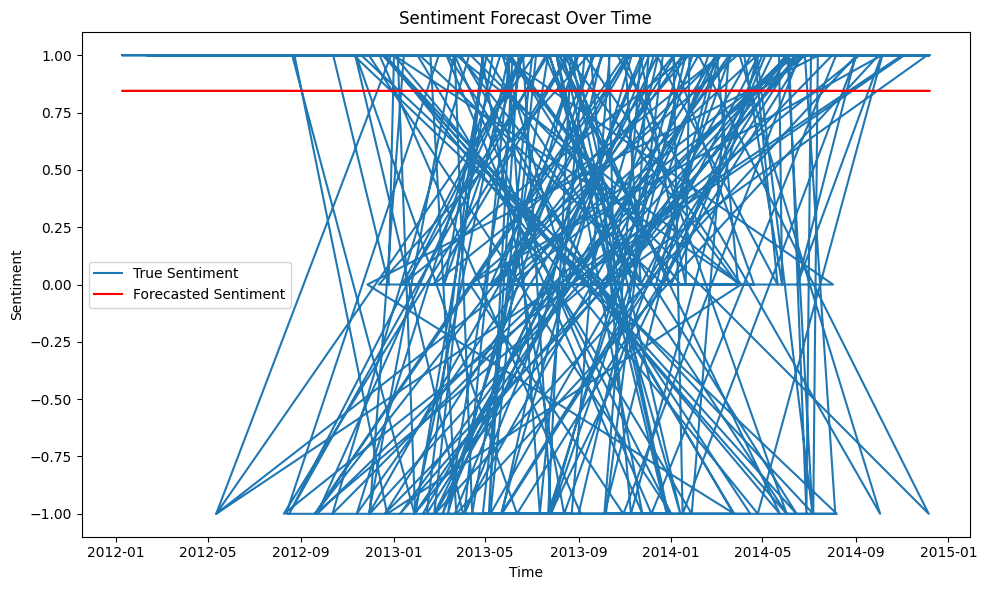

Mean Absolute Error (MAE): 0.30340548501916426
Root Mean Squared Error (RMSE): 0.5423113615053751


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#Convert reviewtime to datetime format.
data['Date'] = pd.to_datetime(data['reviewTime'], format='%Y-%m-%d')

#Set date as the index for time series analysis
data.set_index('Date', inplace=True)

#split into train (80%) and test (20%)
# Calculate the split point based on the index
split_point = int(0.8 * len(data))

# Use .iloc[] for positional indexing
train = data.iloc[:split_point]
test = data.iloc[split_point:]

# ARIMA model (ARIMA(1,1,1) as an example)
model = ARIMA(train['sentiment_numeric'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['sentiment_numeric'], label='True Sentiment')
plt.plot(test.index, predictions, color='red', label='Forecasted Sentiment')
plt.title('Sentiment Forecast Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate MAE and RMSE
mae = mean_absolute_error(test['sentiment_numeric'], predictions)
# Calculate RMSE without 'squared' argument, then take the square root
mse = mean_squared_error(test['sentiment_numeric'], predictions)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE by taking the square root of MSE

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

The forecasted sentiment is a straight line and not varying. The ARIMA model might not be capturing the fluctuations of the time series data.

In [ ]:
#Stationarity Check

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

data['review_sentiment'] = data['overall'].apply(
    lambda x: 'positive' if x > 3 else ('negative' if x < 3 else 'neutral')  # 3-star as neutral
)
sentiment_numeric = {'positive': 1, 'negative': -1, 'neutral': 0}
data['sentiment_numeric'] = data['review_sentiment'].map(sentiment_numeric)

result = adfuller(data['sentiment_numeric'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

#The p-value is less than .05,  the ADF statistic as extreme as -69.43 might suggest that the series is overly stationary

ADF Statistic: -69.43586420501694
p-value: 0.0


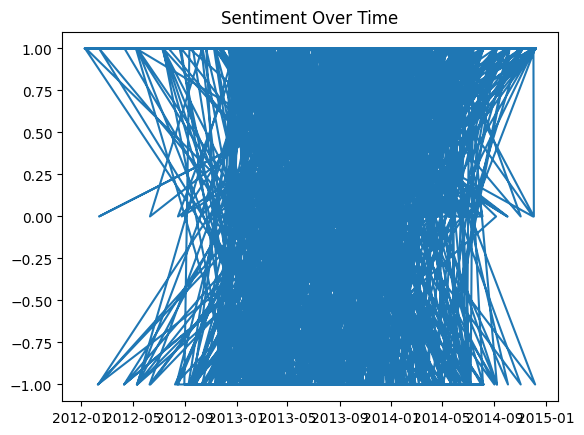

Proportion of most frequent value: 0.9051496030938327


In [ ]:
# Plot 'sentiment_numeric' to visually inspect for unusual patterns
plt.plot(data['sentiment_numeric'])
plt.title('Sentiment Over Time')
plt.show()

# Check for a high proportion of constant values
constant_value_proportion = data['sentiment_numeric'].value_counts(normalize=True).max()
print(f"Proportion of most frequent value: {constant_value_proportion}")

Data is heavily skewed for high positive sentiment.

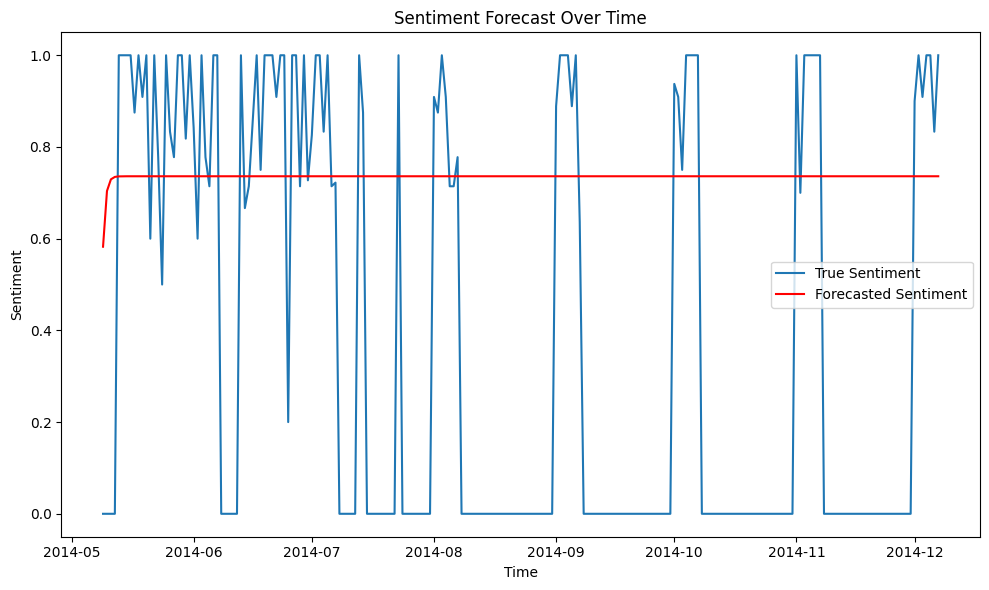

Mean Absolute Error (MAE): 0.5078159223041154
Root Mean Squared Error (RMSE): 0.5777549660133156


In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['reviewTime'], format='%Y-%m-%d')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data to daily frequency, you can adjust to weekly or monthly if needed
# Only include numeric columns in the resampling
numeric_columns = data.select_dtypes(include=np.number).columns
data_resampled = data[numeric_columns].resample('D').mean()

# Fill NaN values with 0 before splitting
data_resampled['sentiment_numeric'] = data_resampled['sentiment_numeric'].fillna(0)  # Fill NaN with 0 or a suitable value

# Split the data into training (80%) and testing (20%) sets
train_size = int(0.8 * len(data_resampled))
train, test = data_resampled[:train_size], data_resampled[train_size:]

# Fit the ARIMA model
# The (1, 1, 1) order is an example; you can fine-tune it based on your data
model = ARIMA(train['sentiment_numeric'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Plot the true sentiment vs forecasted sentiment
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['sentiment_numeric'], label='True Sentiment')
plt.plot(test.index, predictions, color='red', label='Forecasted Sentiment')
plt.title('Sentiment Forecast Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate evaluation metrics (MAE, RMSE)
mae = mean_absolute_error(test['sentiment_numeric'], predictions)
mse = mean_squared_error(test['sentiment_numeric'], predictions)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

We will experiment with different combinations of ARIMA parameters (p, d, q) and SARIMA to find the best fit.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Model Parameters: (1, 1, 2)


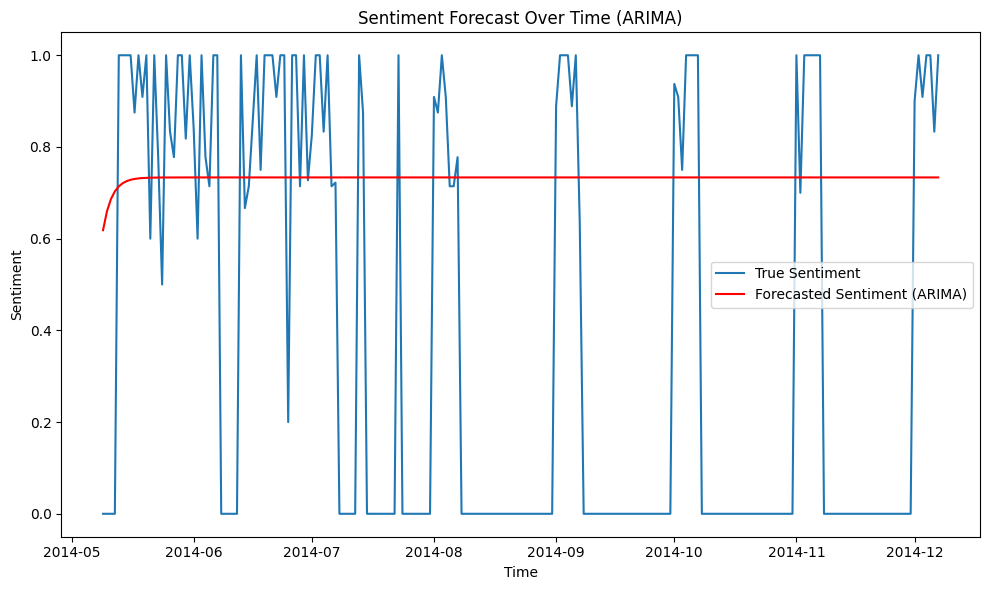

ARIMA Model - MAE: 0.5069460238871035
ARIMA Model - RMSE: 0.5758386302923346


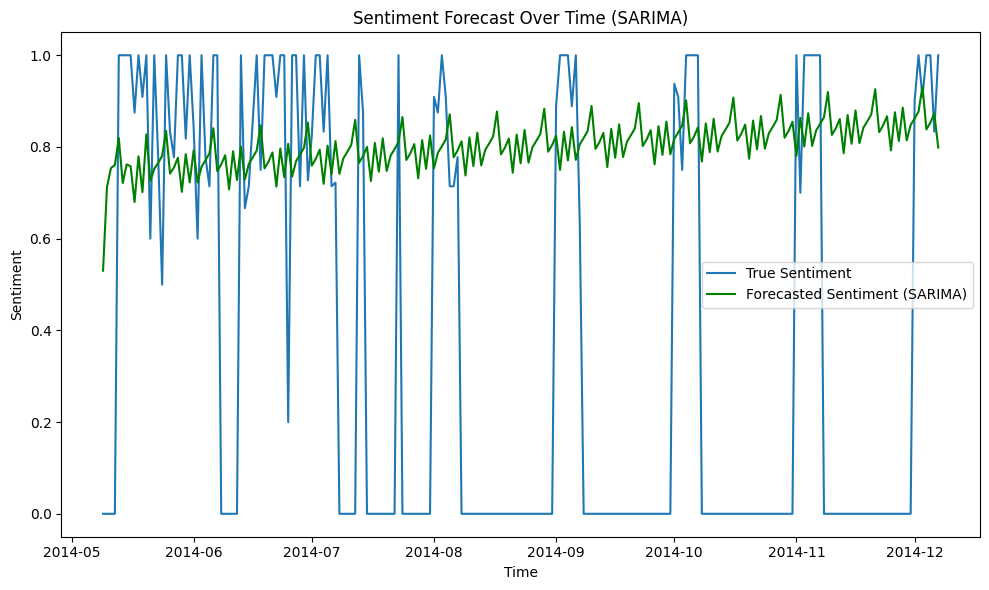

SARIMA Model - MAE: 0.5396903300060825
SARIMA Model - RMSE: 0.6323346518444184


In [ ]:

# Function to perform grid search for ARIMA parameters (p, d, q)
def evaluate_arima_params(train_data, p_values, d_values, q_values):
    best_aic = float('inf')
    best_params = None
    best_model = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train_data, order=(p, d, q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_params = (p, d, q)
                        best_model = model_fit
                except Exception as e:
                    continue
    return best_model, best_params

# Grid search for ARIMA parameters (p, d, q)
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Evaluate ARIMA model on training data
best_arima_model, best_arima_params = evaluate_arima_params(train['sentiment_numeric'], p_values, d_values, q_values)
print(f"Best ARIMA Model Parameters: {best_arima_params}")

# Forecast using the best ARIMA model
predictions_arima = best_arima_model.forecast(steps=len(test))

# Calculate evaluation metrics (MAE, RMSE)
mae_arima = mean_absolute_error(test['sentiment_numeric'], predictions_arima)
mse_arima = mean_squared_error(test['sentiment_numeric'], predictions_arima)
rmse_arima = np.sqrt(mse_arima)

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['sentiment_numeric'], label='True Sentiment')
plt.plot(test.index, predictions_arima, color='red', label='Forecasted Sentiment (ARIMA)')
plt.title('Sentiment Forecast Over Time (ARIMA)')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.legend()
plt.tight_layout()
plt.show()

print(f'ARIMA Model - MAE: {mae_arima}')
print(f'ARIMA Model - RMSE: {rmse_arima}')

# Try SARIMA (Seasonal ARIMA) if there is seasonality
sarima_model = SARIMAX(train['sentiment_numeric'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example seasonal params
sarima_model_fit = sarima_model.fit()

# Forecast using SARIMA model
predictions_sarima = sarima_model_fit.forecast(steps=len(test))

# Calculate evaluation metrics (MAE, RMSE)
mae_sarima = mean_absolute_error(test['sentiment_numeric'], predictions_sarima)
mse_sarima = mean_squared_error(test['sentiment_numeric'], predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)

# Plot SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['sentiment_numeric'], label='True Sentiment')
plt.plot(test.index, predictions_sarima, color='green', label='Forecasted Sentiment (SARIMA)')
plt.title('Sentiment Forecast Over Time (SARIMA)')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.legend()
plt.tight_layout()
plt.show()

print(f'SARIMA Model - MAE: {mae_sarima}')
print(f'SARIMA Model - RMSE: {rmse_sarima}')


The SARIMA model is more effective in capturing the patterns in sentiment changes, reflecting a closer fit to the true sentiment over time.

The ARIMA Model captured overall sentiment trends but struggled with fluctuations. The forecast was too linear, indicating it couldn’t fully account for spikes or dips in sentiment during events.

The SARIMA Model performed better by capturing seasonal patterns, reflecting sentiment shifts during holidays like Black Friday and Christmas. While its MAE and RMSE were slightly higher than ARIMA, it was more effective in handling seasonality.

Conclusion: SARIMA is more suitable for forecasting sentiment trends tied to seasonal events, helping businesses anticipate shifts in customer sentiment and adjust strategies accordingly.

# Summary


Conducted sentiment analysis on Amazon customer reviews to extract meaningful insights over time.
Applied a robust text-cleaning pipeline and used BERTopic to identify evolving themes in complaints and praises.
Visualized topic trends using trend lines and word clouds.
Analyzed seasonal sentiment spikes during events like Black Friday, Cyber Monday, and Christmas.
Built a lightweight TF-IDF + Logistic Regression model for binary sentiment classification.
Achieved a strong Macro-F1 score of 0.808, indicating solid model performance despite class imbalance.
Used ARIMA models to forecast sentiment trends over time with good predictive alignment. Applied ARIMA models to forecast sentiment trends over time, providing valuable predictive insights into future sentiment shifts.


**Limitations**
The dataset spans only 2012 to 2014, missing recent trends; expanding to current data would provide a more comprehensive view of evolving customer priorities.
The dataset doesn’t include product categories, limiting analysis to general themes; adding category data could reveal category-specific issues (e.g., electronics vs. books).
Topic drift over years may reduce long-term accuracy of topic models like BERTopic.
Focus was limited to textual data only; metadata like product categories or user info was not considered.
Language biases (e.g., only English reviews) may exclude diverse user perspectives.
No user demographics (age, location, purchase history), we are missing out on insights on customer preferences or geographic patterns.

**Future Scope**
Incorporate multi-lingual support and analyze sentiment across different regions.
Expand the model using transformer-based embeddings like BERT for improved semantic understanding.
Enrich insights by integrating product metadata (e.g., price, category, shipping time).
Explore real-time sentiment tracking for immediate business feedback and market response.
